In [5]:
# Importing libraries

# Math Libraries
import random
import math
import numpy as np

# Data Processing
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 

# ML
from sklearn.linear_model import LogisticRegression # Importing Logistic Model
from sklearn.model_selection import train_test_split # Train Test Split
from sklearn.preprocessing import MinMaxScaler # Data normalizer Min Max Scale
from sklearn.metrics import accuracy_score # Calculate the accuracy
from scipy.optimize import brentq, newton

# Loading Bar
from time import sleep
from tqdm import tqdm

# Supress warnings
import warnings; warnings.simplefilter('ignore')


## Lower Bound for the minimax probability of error using N = 8B



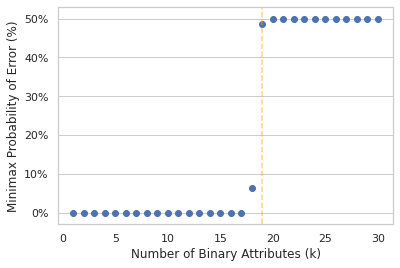

In [3]:
N = 8 * 10**(9)
k = (1 + np.arange(30))
d = 2** k
m = N / d
eps = 0.01
bound = 50 * np.maximum(1 - (1 / np.sqrt(d)) * (1 + 4 * eps**2)**(m / 2), 0)

import matplotlib.ticker as mtick
sns.set()
with sns.axes_style("whitegrid"):
  fig = plt.figure()

  a = fig.add_subplot(1,1,1)
  a.scatter(k, bound)#, linestyles='', marker='o', edgecolor = 'black', linewidth = 1)
  plt.xlabel('Number of Binary Attributes (k)')
  plt.ylabel('Minimax Probability of Error (%)')
  fmt = '%.0f%%'
  xticks = mtick.FormatStrFormatter(fmt)
  a.yaxis.set_major_formatter(xticks)
  a.grid(axis='x')
  plt.axvline(19, 0,50, color = 'orange', linestyle='--', alpha=0.5, label = 'm = Number of groups')
  plt.ylim([-3, 53])   
  plt.savefig('Phase_trans_lower_bound_attribute.pdf', bbox_inches='tight')

## Lower Bound for the minimax probability of error using d = 141 (Adult)

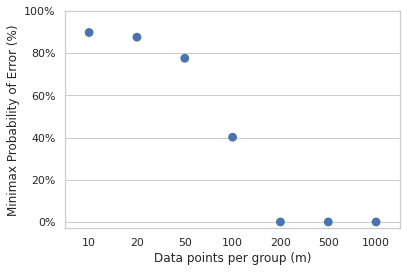

In [4]:
sns.set()
import matplotlib.ticker as mtick
with sns.axes_style("whitegrid"):
  d = 141
  n = np.array([10,20,50,100,200,500,1000])
  eps = 0.1
  bound = 100 * np.maximum(1 - (1 / np.sqrt(d)) * (1 + 4 * eps**2)**(n / 2), 0)
  a = sns.pointplot(n, bound, linestyles='', marker='o', edgecolor = 'black', linewidth = 1)
  plt.xlabel('Data points per group (m)')
  plt.ylabel('Minimax Probability of Error (%)')
  a.yaxis.set_major_formatter(mtick.PercentFormatter())
  plt.ylim([-3, 100])   
  plt.savefig('Phase_trans_lower_bound.pdf',  bbox_inches='tight')

## The epistemic Limits



In [7]:
def g(N, eps):
  def f(x):
      return np.log(1/2) - x / 2 * np.log(1/2)  -  (  N / 2**(x + 1) )* np.log((1 + 4 * eps**2))
  return f

In [8]:
#N = np.array([100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1* 10**6, 2* 10**6, 5* 10**6, 10 * 10**6])
N = np.array([100, 500, 1000,  5000, 10000,  50000, 100000,  500000, 1* 10**6,  5* 10**6, 10 * 10**6])

eps = [0.005, 0.01, 0.02, .05, .10, .20]
q = np.size(N)
Max = np.zeros((q, 6))
for j in range(6):
  for i in range(q):
    Max[i, j] = np.floor(newton(g(N[i], eps[j] ), np.log(N[i])))


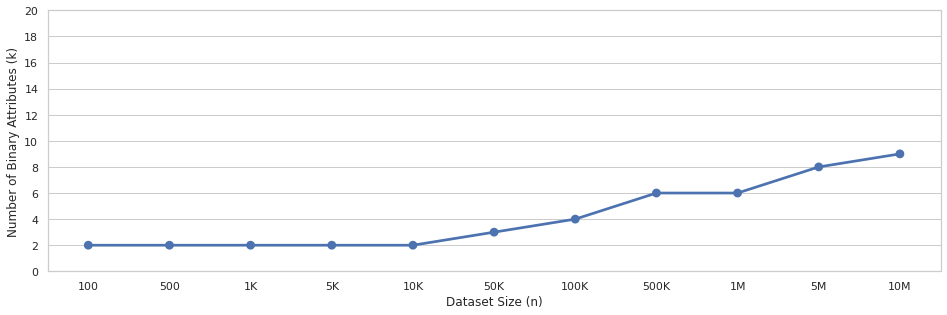

In [10]:
sns.set()
labels = ['100','500','1K','5K','10K','50K','100K','500K','1M',  '5M', '10M']

import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
with sns.axes_style("whitegrid"):
  fig = plt.figure()
  fig.set_size_inches(16, 4.8)
  a = fig.add_subplot(1,1,1)
  sns.pointplot(N, Max[:, 1], linestyles='-', marker='o', linewidth = 1, ax = a)
  a.set_xticklabels(labels)
  a.yaxis.set_major_locator(MaxNLocator(integer=True))
  plt.xlabel('Dataset Size (n)')
  plt.ylabel('Number of Binary Attributes (k)')
  plt.ylim([0, 20])   


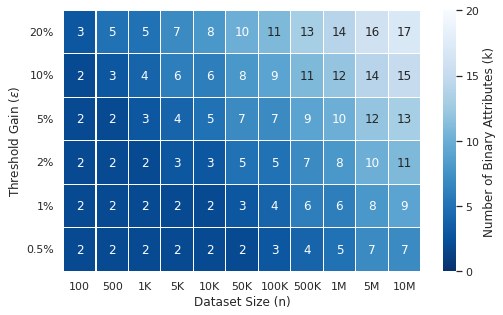

In [11]:
fig = plt.figure()
fig.set_size_inches(8, 4.8)
a = pd.DataFrame(Max.T)
a = a.set_axis(eps, axis=0, inplace=False)
a = a.set_axis(N, axis=1, inplace=False)
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
ax = sns.heatmap(a, annot=True,vmin=0, vmax=20, cmap = 'Blues_r',  fmt='g', linewidths=.2,cbar_kws={'label': 'Number of Binary Attributes (k)'})
plt.ylabel(r'Threshold Gain ($\epsilon$)')
plt.xlabel('Dataset Size (n)')

ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_xticklabels(labels)
ax.set_yticklabels(['0.5%', '1%', '2%', '5%', '10%', '20%'] )
ax.invert_yaxis()

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 5, 10, 15, 20])
cbar.set_ticklabels(['0', '5', '10', '15', '20'])
plt.savefig('how_large_map.pdf',  bbox_inches='tight')

In [12]:
from scipy.optimize import brentq, newton
def g_1(N, eps):
  def f_1(x):
      return np.log(1/2) - np.log(1/(np.sqrt(x))) - (N/(2*x)) * np.log(1 + 4 * eps**2)
  return f_1

In [13]:
#N = np.array([100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1* 10**6, 2* 10**6, 5* 10**6, 10 * 10**6])
N = np.array([100, 500, 1000,  5000, 10000,  50000, 100000,  500000, 1* 10**6,  5* 10**6, 10 * 10**6])

eps = [0.005, 0.01, 0.02, .05, .10, .20]
q = np.size(N)
annotation = np.empty((q, 6), dtype='object')
Max_g = np.zeros((q, 6))
for j in range(6):
  for i in range(q):
    Max_g[i, j] = np.floor(newton(g_1(N[i], eps[j] ), np.log(N[i])))
    if Max_g[i, j] < 1000:
      annotation[i,j] = str(int(Max_g[i, j]))
    else:
      annotation[i,j] = str(int(Max_g[i, j] / 1000)) + 'k'

      

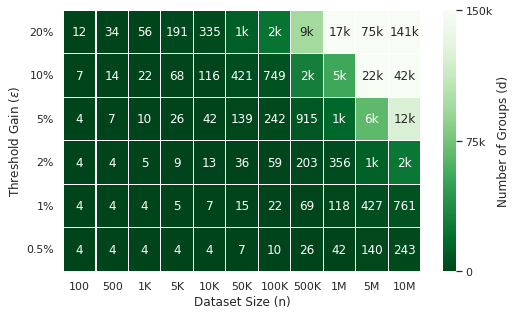

In [14]:
fig = plt.figure()
fig.set_size_inches(8, 4.8)
a = pd.DataFrame(Max_g.T)
a = a.set_axis(eps, axis=0, inplace=False)
a = a.set_axis(N, axis=1, inplace=False)
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
ax = sns.heatmap(a, annot=annotation.T , vmin=0, vmax=15000, cmap = 'Greens_r',  fmt='', linewidths=.2,cbar_kws={'label': 'Number of Groups (d)'})
plt.ylabel(r'Threshold Gain ($\epsilon$)')
plt.xlabel('Dataset Size (n)')
anot = []

ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_xticklabels(labels)
ax.set_yticklabels(['0.5%', '1%', '2%', '5%', '10%', '20%'] )
ax.invert_yaxis()
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 7500,  15000])
cbar.set_ticklabels(['0',  '75k', '150k'])
plt.savefig('how_large_group_map.pdf',  bbox_inches='tight')